In [2]:
import nltk
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 1. THE CORPUS
# We treat this string as if it were a file read from disk.
corpus = "AI predicts market trends. AI predicts health outcomes. Market trends predicts AI. AI predicts AI."



In [ ]:
# 2. FILE PROCESSING & TOKENIZATION
# In a real scenario, you'd use: with open('file.txt', 'r') as f: text = f.read()
# nltk.download('punkt_tab', quiet=False) # do this for the first time if you have not downloaded this package to your environment.
nltk.data.path.append("/Users/sihong/nltk_data")  # Adjust path as needed
sentences = nltk.sent_tokenize(corpus.lower())
words = nltk.word_tokenize(corpus.lower())
# Remove punctuation for clear probability calculation
words = [word for word in words if word.isalnum()]

print(f"Total Tokens: {len(words)}")
print(f"Unique Vocabulary: {set(words)}\n")



[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sihong/nltk_data...


Total Tokens: 15
Unique Vocabulary: {'predicts', 'market', 'ai', 'trends', 'health', 'outcomes'}



[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
# 3. CONSTRUCTING THE FREQUENCY VECTOR (MLE)
# The MLE of a word probability is: Count(word) / Total Words
word_counts = Counter(words)
total_count = len(words)

# Map words to indices for matrix/vector representation
vocab = sorted(list(word_counts.keys()))
word_to_idx = {word: i for i, word in enumerate(vocab)}

# Construct the Probability Vector (MLE Estimates)
prob_vector = np.array([word_counts[word] / total_count for word in vocab])



Word            | Count      | MLE Probability
---------------------------------------------
ai              | 5          | 0.3333
health          | 1          | 0.0667
market          | 2          | 0.1333
outcomes        | 1          | 0.0667
predicts        | 4          | 0.2667
trends          | 2          | 0.1333


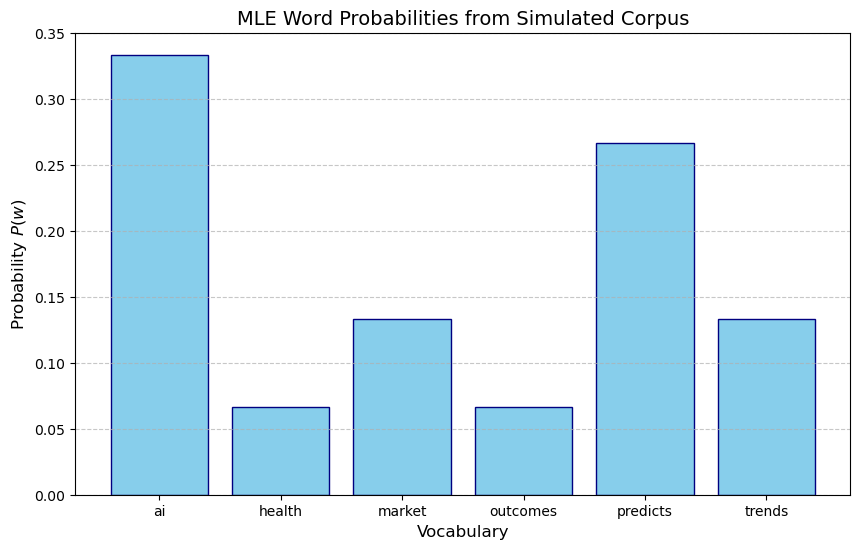

In [10]:
# 4. DATA REPRESENTATION (The Matrix)
# Let's show the word counts in a clear table-like format
print(f"{'Word':<15} | {'Count':<10} | {'MLE Probability'}")
print("-" * 45)
for i, word in enumerate(vocab):
    print(f"{word:<15} | {word_counts[word]:<10} | {prob_vector[i]:.4f}")

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.bar(vocab, prob_vector, color='skyblue', edgecolor='navy')
plt.title("MLE Word Probabilities from Simulated Corpus", fontsize=14)
plt.xlabel("Vocabulary", fontsize=12)
plt.ylabel("Probability $P(w)$", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()